In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as tf
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

data_folder = './data'
transform_pipeline = tf.Compose([
    tf.ToTensor(),
    tf.Normalize((0.1307,), (0.3081,)),
    tf.Resize((32, 32))
])

In [2]:
# Download MNIST dataset
train_dataset = datasets.MNIST(root=data_folder, train=True, transform=transform_pipeline, download=True)
test_dataset = datasets.MNIST(root=data_folder, train=False, transform=transform_pipeline, download=True)


In [3]:
def create_data_loaders(train_batch_size, test_batch_size):
    train_loader = torch.utils.data.DataLoader(
        dataset=train_dataset,
        batch_size=train_batch_size,
        shuffle=True
    )
    test_loader = torch.utils.data.DataLoader(
        dataset=test_dataset,
        batch_size=test_batch_size,
        shuffle=True
    )
    return train_loader, test_loader


In [4]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)


In [5]:
def train_network(network, criterion, epoch_count, data_loader, optimizer):
    avg_loss = 0
    total_samples = 0
    correct_count = 0
    total_loss = 0
    for batch_idx, (images, labels) in enumerate(data_loader):
        optimizer.zero_grad()
        images, labels = Variable(images), Variable(labels)
        outputs = network(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        predicted_classes = np.argmax(outputs.data, axis=1)
        
        total_samples += labels.size(0)
        correct_count += (predicted_classes == labels).sum().item()
        accuracy = 100.0 * correct_count / total_samples
        total_loss += loss.data
        
        if (batch_idx + 1) % 150 == 0 or (batch_idx + 1) == len(data_loader):
            print(f'Epoch: {epoch_count}, Batch: {batch_idx + 1}, Accuracy: {accuracy:.2f}%, Loss: {loss.data:.6f}')

    avg_loss = total_loss / (batch_idx + 1)
    return avg_loss, round(accuracy, 2)

In [6]:
# Training first model
train_loader, test_loader = create_data_loaders(64, 1000)
model_one = SimpleCNN()
optimizer_one = optim.SGD(model_one.parameters(), lr=0.01, momentum=0.9)
loss_function = nn.CrossEntropyLoss()
loss_values_one = []
accuracy_values_one = []

for epoch in range(1, 11):
    loss, accuracy = train_network(model_one, loss_function, epoch, train_loader, optimizer_one)
    loss_values_one.append(loss)
    accuracy_values_one.append(accuracy)

Epoch: 1, Batch: 150, Accuracy: 53.85%, Loss: 0.278477
Epoch: 1, Batch: 300, Accuracy: 73.61%, Loss: 0.128041
Epoch: 1, Batch: 450, Accuracy: 81.03%, Loss: 0.188877
Epoch: 1, Batch: 600, Accuracy: 84.95%, Loss: 0.084633
Epoch: 1, Batch: 750, Accuracy: 87.42%, Loss: 0.062166
Epoch: 1, Batch: 900, Accuracy: 89.09%, Loss: 0.127970
Epoch: 1, Batch: 938, Accuracy: 89.42%, Loss: 0.293701
Epoch: 2, Batch: 150, Accuracy: 98.01%, Loss: 0.011474
Epoch: 2, Batch: 300, Accuracy: 98.10%, Loss: 0.096434
Epoch: 2, Batch: 450, Accuracy: 98.02%, Loss: 0.030951
Epoch: 2, Batch: 600, Accuracy: 98.10%, Loss: 0.105564
Epoch: 2, Batch: 750, Accuracy: 98.12%, Loss: 0.100431
Epoch: 2, Batch: 900, Accuracy: 98.18%, Loss: 0.029088
Epoch: 2, Batch: 938, Accuracy: 98.17%, Loss: 0.056274
Epoch: 3, Batch: 150, Accuracy: 98.51%, Loss: 0.088334
Epoch: 3, Batch: 300, Accuracy: 98.58%, Loss: 0.014666
Epoch: 3, Batch: 450, Accuracy: 98.58%, Loss: 0.110223
Epoch: 3, Batch: 600, Accuracy: 98.65%, Loss: 0.004916
Epoch: 3, 

In [7]:
class AdvancedCNN(nn.Module):
    def __init__(self):
        super(AdvancedCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 64, 5)
        self.fc1 = nn.Linear(1024, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv3(x), 2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        return F.log_softmax(self.fc2(x), dim=1)

Starting a new epoch
Epoch: 1, Batch: 150, Accuracy: 60.55%, Loss: 0.456318
Epoch: 1, Batch: 300, Accuracy: 75.65%, Loss: 0.204136
Epoch: 1, Batch: 450, Accuracy: 81.73%, Loss: 0.150322
Epoch: 1, Batch: 600, Accuracy: 85.02%, Loss: 0.233688
Epoch: 1, Batch: 750, Accuracy: 87.17%, Loss: 0.104229
Epoch: 1, Batch: 900, Accuracy: 88.72%, Loss: 0.025020
Epoch: 1, Batch: 938, Accuracy: 89.04%, Loss: 0.082364
Starting a new epoch
Epoch: 2, Batch: 150, Accuracy: 96.32%, Loss: 0.033322
Epoch: 2, Batch: 300, Accuracy: 96.58%, Loss: 0.035974
Epoch: 2, Batch: 450, Accuracy: 96.72%, Loss: 0.037123
Epoch: 2, Batch: 600, Accuracy: 96.75%, Loss: 0.167532
Epoch: 2, Batch: 750, Accuracy: 96.84%, Loss: 0.027518
Epoch: 2, Batch: 900, Accuracy: 96.90%, Loss: 0.109402
Epoch: 2, Batch: 938, Accuracy: 96.90%, Loss: 0.012576
Starting a new epoch
Epoch: 3, Batch: 150, Accuracy: 97.14%, Loss: 0.108505
Epoch: 3, Batch: 300, Accuracy: 97.35%, Loss: 0.065481
Epoch: 3, Batch: 450, Accuracy: 97.49%, Loss: 0.113853
Ep

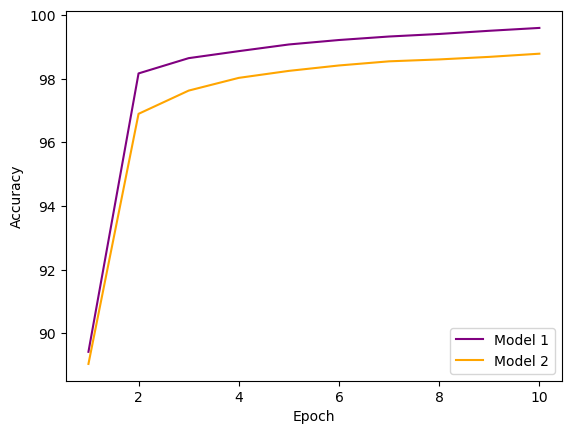

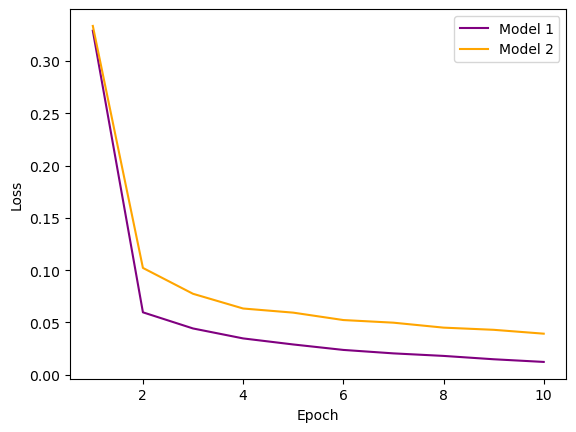

In [8]:
# Training second model
train_loader, test_loader = create_data_loaders(64, 1000)
model_two = AdvancedCNN()
optimizer_two = optim.SGD(model_two.parameters(), lr=0.01, momentum=0.9)
loss_values_two = []
accuracy_values_two = []

for epoch in range(1, 11):
    print('Starting a new epoch')
    loss, accuracy = train_network(model_two, loss_function, epoch, train_loader, optimizer_two)
    loss_values_two.append(loss)
    accuracy_values_two.append(accuracy)

# Plotting results
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(np.arange(1, 11), accuracy_values_one, color="purple")
plt.plot(np.arange(1, 11), accuracy_values_two, color="orange")
plt.legend(['Model 1', 'Model 2'])
plt.show()

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(np.arange(1, 11), loss_values_one, color="purple")
plt.plot(np.arange(1, 11), loss_values_two, color="orange")
plt.legend(['Model 1', 'Model 2'])
plt.show()